In [1]:
!pip install gensim
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 8.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2024.9.0 requires fsspec==2024.9.0.*, but you have fsspec 2024.6.1 which is incompatible.


In [2]:
import numpy as np

In [3]:
import gensim.downloader as api

print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [6]:
word2vec_model = api.load("word2vec-google-news-300")
glove_model = api.load("glove-wiki-gigaword-100")
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


In [7]:
def find_similar_words(model, word):
    try:
        similar_words = model.most_similar(word)
        return similar_words[:3]
    except KeyError:
        return []

word = "sad"
print(f"Word2Vec similar word: {find_similar_words(word2vec_model, word)}")
print(f"GloVe similar word: {find_similar_words(glove_model, word)}")
print(f"FastText similar word: {find_similar_words(fasttext_model, word)}")

Word2Vec similar word: [('saddening', 0.7273085117340088), ('Sad', 0.6610826849937439), ('saddened', 0.6604381799697876)]
GloVe similar word: [('sorry', 0.7547181248664856), ('awful', 0.7284239530563354), ('tragic', 0.7238599061965942)]
FastText similar word: [('sorrowful', 0.7941397428512573), ('saddening', 0.7933411002159119), ('happy-sad', 0.7531512975692749)]


In [9]:
def calculate_similarity(embedding_model, word1, word2):
    try:
        similarity = embedding_model.similarity(word1, word2)
        return similarity
    except KeyError:
        return None

word1 = "boy"
word2 = "man"
print(f"Word2Vec similarity: {calculate_similarity(word2vec_model, word1, word2)}")
print(f"GloVe similarity: {calculate_similarity(glove_model, word1, word2)}")
print(f"FastText similarity: {calculate_similarity(fasttext_model, word1, word2)}")

Word2Vec similarity: 0.6824870705604553
GloVe similarity: 0.7914870977401733
FastText similarity: 0.6747758388519287


In [12]:
def find_closest_words(embedding_model, positive_list, negative_list=None):
    try:
        closest_words = embedding_model.most_similar(positive=positive_list, negative=negative_list)
        return closest_words[:3]
    except KeyError:
        return []

print(f"Word2Vec closest words (king - man): {find_closest_words(word2vec_model, ['king'], ['man'])}")
print(f"GloVe closest words (king - man): {find_closest_words(glove_model, ['king'], ['man'])}")
print(f"FastText closest words (king - man): {find_closest_words(fasttext_model, ['king'], ['man'])}")

print(f"Word2Vec closest words (queen - woman): {find_closest_words(word2vec_model, ['queen'], ['woman'])}")
print(f"GloVe closest words (queen - woman): {find_closest_words(glove_model, ['queen'], ['woman'])}")
print(f"FastText closest words (queen - woman): {find_closest_words(fasttext_model, ['queen'], ['woman'])}")

Word2Vec closest words (king - man): [('kings', 0.4295138120651245), ('queen', 0.39028695225715637), ('Pansy_Ho_Chiu', 0.38272255659103394)]
GloVe closest words (king - man): [('vajiravudh', 0.7025760412216187), ('prajadhipok', 0.6731774210929871), ('andrianampoinimerina', 0.6597247123718262)]
FastText closest words (king - man): [('kings', 0.3947177529335022), ('co-king', 0.37630558013916016), ('Cináed', 0.3724116384983063)]
Word2Vec closest words (queen - woman): [('queens', 0.454903244972229), ('king', 0.44688645005226135), ('kings', 0.39552411437034607)]
GloVe closest words (queen - woman): [('vajiravudh', 0.5408981442451477), ('willem-alexander', 0.5305116176605225), ('1772-1945', 0.5265165567398071)]
FastText closest words (queen - woman): [('queens', 0.47622233629226685), ('Queen', 0.35593655705451965), ('queenside', 0.341717392206192)]


In [14]:
def find_analogy_and_rank(embedding_model, word1, word2, word3, target_word):
    try:
        analogy_result = embedding_model.most_similar(positive=[word1, word2], negative=[word3], topn=7000)
        
        rank = next((idx for idx, element in enumerate(analogy_result) if element[0].lower() == target_word.lower()), None)
        return analogy_result, rank
    except KeyError:
        return [], None
    
for model_name, embedding_model in [("Word2Vec", word2vec_model), ("GloVe", glove_model), ("FastText", fasttext_model)]:
    analogy_result, rank = find_analogy_and_rank(embedding_model, "france", "paris", "germany", "berlin")
    if rank is not None:
        print(f"{model_name} analogy result: 'berlin's rank: {rank+1}")
    else:
        print(f"{model_name} analogy result: 'berlin' not found")

Word2Vec analogy result: 'berlin's rank: 6987
GloVe analogy result: 'berlin's rank: 1652
FastText analogy result: 'berlin's rank: 915


In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(embedding_model, word_list):
    embeddings = [embedding_model[word] for word in word_list if word in embedding_model]
    labels = [word for word in word_list if word in embedding_model]
    
    pca_model = PCA(n_components=2)
    reduced_embeddings = pca_model.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 10))
    for i, label in enumerate(labels):
        x, y = reduced_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()


In [29]:
word_list = [
    "king", "queen", "man", "woman", "france", "paris", "germany", "berlin",
]

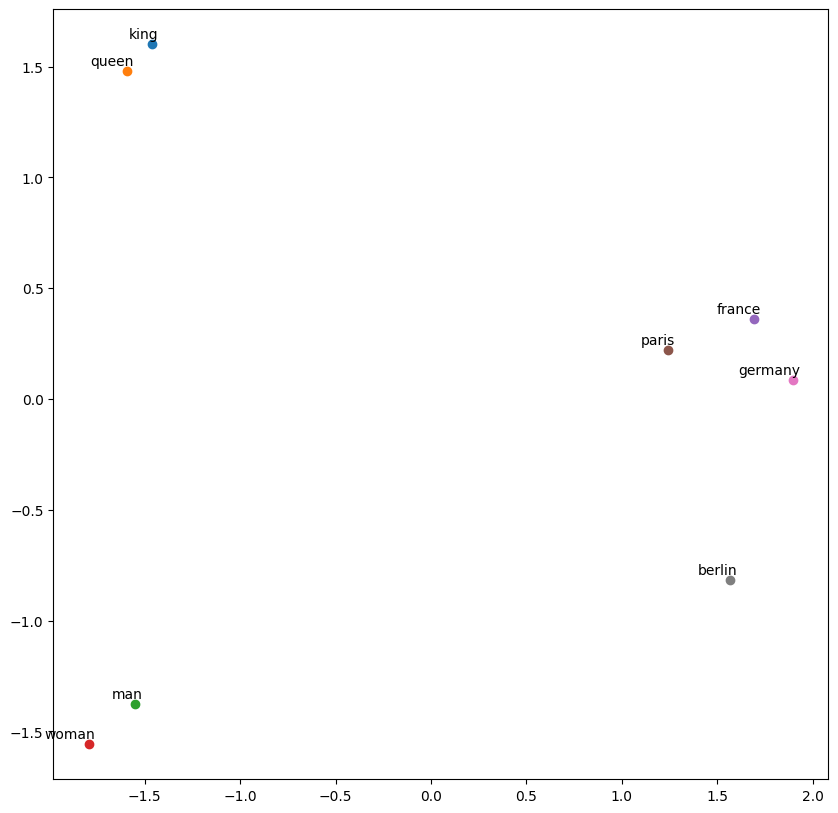

In [26]:
plot_word_embeddings(word2vec_model, word_list)

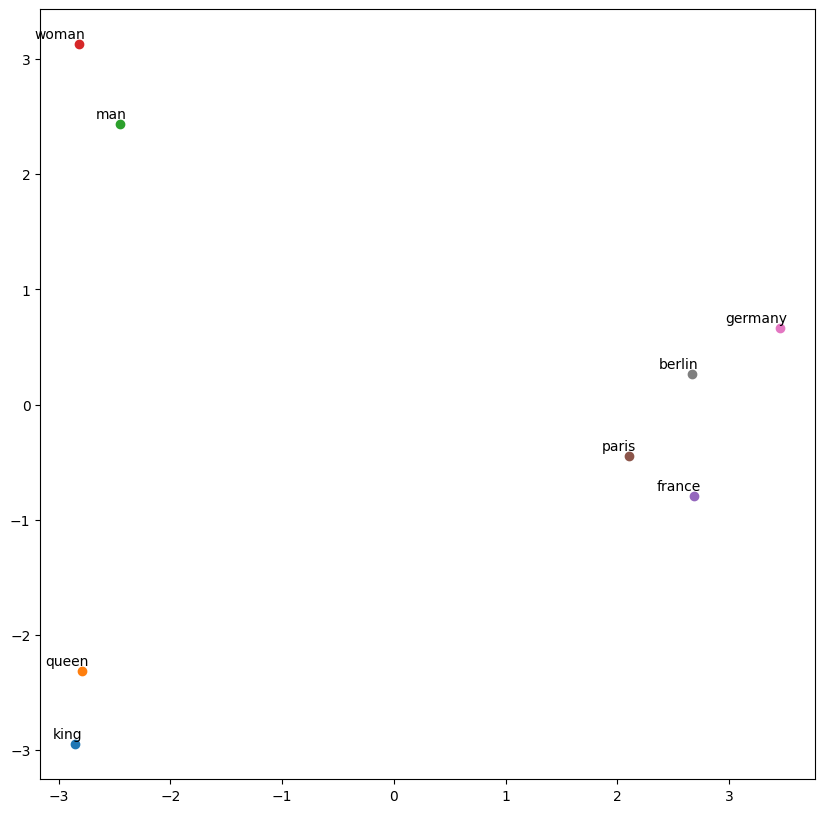

In [27]:
plot_word_embeddings(glove_model, word_list)

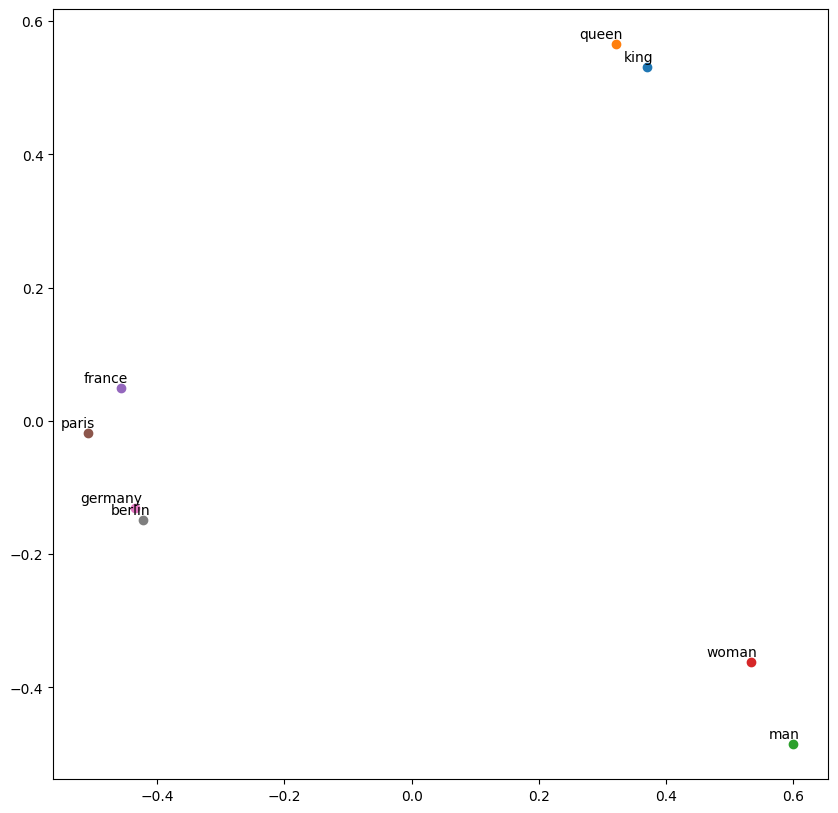

In [28]:
plot_word_embeddings(fasttext_model, word_list)

In [32]:
def plot_vector_operations(embedding_model, word1_2, word3_4, word5_6, word7_8):
    try:
        vector1 = embedding_model[word1_2[0]] - embedding_model[word1_2[1]]
        vector2 = embedding_model[word3_4[0]] - embedding_model[word3_4[1]]
        vector3 = embedding_model[word5_6[0]] - embedding_model[word5_6[1]]
        vector4 = embedding_model[word7_8[0]] - embedding_model[word7_8[1]]
    except KeyError as e:
        print(f"Error: {e}")
        return

    pca_model = PCA(n_components=2)
    word_vectors = np.array([vector1, vector2, vector3, vector4])
    word_labels = [f"{word1_2[0]}-{word1_2[1]}", f"{word3_4[0]}-{word3_4[1]}", f"{word5_6[0]}-{word5_6[1]}", f"{word7_8[0]}-{word7_8[1]}"]
    reduced_vectors = pca_model.fit_transform(word_vectors)
    
    plt.figure(figsize=(10, 10))
    for i, label in enumerate(word_labels):
        x, y = reduced_vectors[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(30, 4), textcoords="offset points", ha="right", va="bottom")
    plt.show()

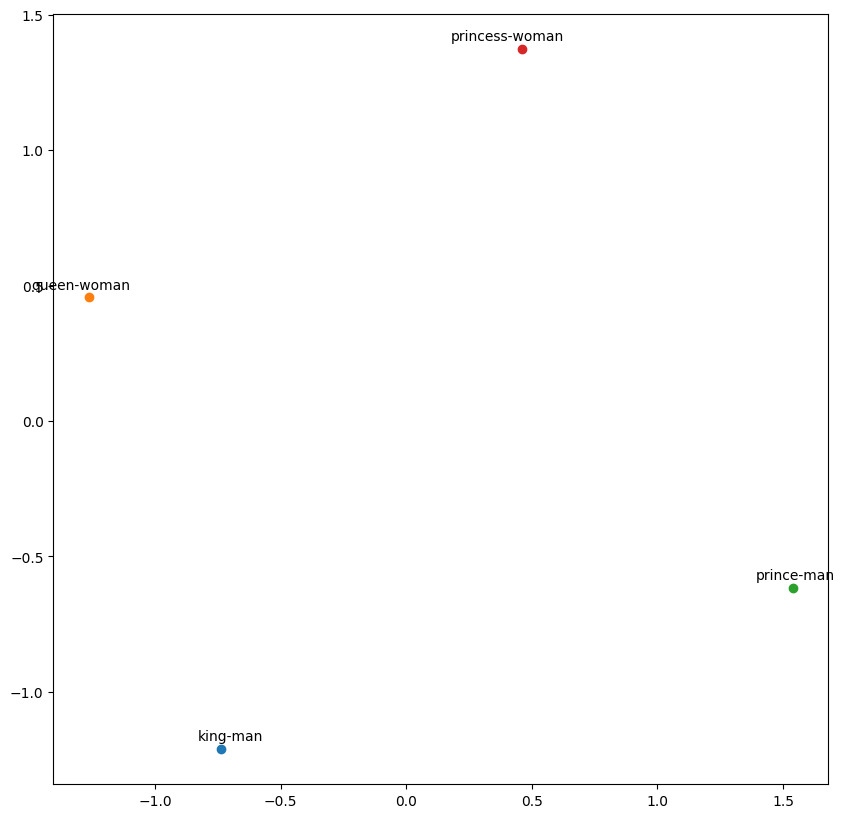

In [34]:
plot_vector_operations(word2vec_model, ["king", "man"], ["queen", "woman"], ["prince", "man"], ["princess", "woman"])

In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from datasets import load_dataset, concatenate_datasets
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText as FT_gensim
import numpy as np

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

In [37]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [38]:
dataset = load_dataset("imdb").shuffle(seed=42)

train_dataset_pos = dataset["train"].filter(lambda x: x["label"] == 1).select(range(6000))
train_dataset_neg = dataset["train"].filter(lambda x: x["label"] == 0).select(range(6000))
test_dataset = dataset["test"].shuffle(seed=42).select(range(1000))

train_dataset = concatenate_datasets([train_dataset_pos, train_dataset_neg])

Filter: 100%|██████████| 25000/25000 [00:00<00:00, 227031.33 examples/s]


In [43]:
def get_embedding(word, embedding_model):
    try:
        return embedding_model[word]
    except KeyError:
        return np.zeros(embedding_model.vector_size)

def get_embeddings_for_sequence(sequence_list, embedding_model):
    embedding_batch = []
    for sequence in sequence_list:
        embeddings = [get_embedding(word, embedding_model) for word in sequence.split()]
        embedding_batch.append(embeddings)
    embedding_batch = torch.nn.utils.rnn.pad_sequence([torch.tensor(embedding, dtype=torch.float32) for embedding in embedding_batch], batch_first=True)
    return embedding_batch

class LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text_embedding):
        embedded = self.dropout(text_embedding)
        lstm_output, (hidden, cell) = self.lstm(embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
        return self.fc(hidden.squeeze(0))

def train(model, train_loader, optimizer, criterion, embedding_model):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, total=len(train_loader), desc="Training"):
        optimizer.zero_grad()
        text, label = batch["text"], batch["label"]
        text_embedding = get_embeddings_for_sequence(text, embedding_model).to(device)
        label = label.to(device)
        predictions = model(text_embedding).squeeze(1)
        loss = criterion(predictions, label.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion, embedding_model):
    model.eval()
    total_loss = 0
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for batch in tqdm(test_loader, total=len(test_loader), desc="Evaluating"):
            text, label = batch["text"], batch["label"]
            text_embeddings = get_embeddings_for_sequence(text, embedding_model).to(device)
            label = label.to(device)
            predictions = model(text_embeddings).squeeze(1)
            loss = criterion(predictions, label.float())
            total_loss += loss.item()
            
            preds = torch.round(torch.sigmoid(predictions))
            all_preds.extend(preds.cpu().numpy().astype(int))
            all_labels.extend(label.cpu().numpy())
            
    accuracy = accuracy_score(all_labels, all_preds)
    
    return total_loss / len(test_loader), accuracy_score(all_labels, all_preds)

In [45]:
hidden_dim = 256
output_dim = 1
n_layers = 4
bidirectional = True
dropout = 0.25

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

embedding_model = {
    "word2vec": word2vec_model,
    "glove": glove_model,
    "fasttext": fasttext_model,
}

for embedding_name, embedding_model in embedding_model.items():
    print("----"*7, f" {embedding_name} ", "----"*7)
    model = LSTM(
        embedding_dim=embedding_model.vector_size,
        hidden_dim=hidden_dim,
        output_dim=output_dim,
        n_layers=n_layers,
        bidirectional=bidirectional,
        dropout=dropout,
    ).to(device)
    
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.BCEWithLogitsLoss().to(device)
    
    for epoch in range(10):
        train_loss = train(model, train_loader, optimizer, criterion, embedding_model)
        test_loss, test_acc = evaluate(model, test_loader, criterion, embedding_model)
        print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
        print("----"*20)


----------------------------  word2vec  ----------------------------


Training:   2%|▏         | 14/750 [00:09<08:33,  1.43it/s]


RuntimeError: MPS backend out of memory (MPS allocated: 3.23 GB, other allocations: 15.11 GB, max allowed: 18.13 GB). Tried to allocate 4.00 KB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).